### 특정 제품에 대해서 decision tree!
#### 먼저 1순위 제품군인 패션잡화!
#### 2순위 화장품/뷰티케어
#### 3순위 속옷/양말/홈웨어

In [1]:
import pandas as pd
df = pd.read_csv("Clustered_Session.csv")

In [64]:
df.shape

(2698696, 8)

In [2]:
df.drop('CLUSTER',axis=1)

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION
0,5873599,8641867,9,82.0,1890,mobile,"buy,search"
1,5873599,6616320,21,105.0,1604,mobile,"buy,search"
2,5873599,5886172,40,41.0,632,mobile,"buy,search"
3,5873884,1050889,15,160.0,1035,mobile,"buy,search"
4,5874461,10298270,5,13.0,298,mobile,buy
...,...,...,...,...,...,...,...
2698691,3500464,8713975,308,71.0,423,mobile,buy
2698692,3501155,4636571,86,44.0,2090,desktop,"buy,search"
2698693,3501397,582632,128,164.0,2435,mobile,buy
2698694,3573271,2328407,9,5.0,986,desktop,buy


In [3]:
mast = pd.read_csv("06.Master.csv")

In [4]:
mast = mast.drop('PD_NM',axis=1)
mast

,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,패션잡화,남성화,남성부츠
4,58820,남성의류,남성의류상의,남성남방셔츠
...,...,...,...,...
847647,400721,여성의류,여성의류상의,여성티셔츠/탑
847648,400382,패션잡화,여성화,여성플랫
847649,400197,시즌스포츠,수영/물놀이,아동수영복
847650,399225,여성의류,여성의류하의,여성스커트


In [5]:
prod = pd.read_csv("01.Pruduct.csv")
prod.head()

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [6]:
prod = prod.drop(['CLNT_ID','HITS_SEQ','PD_ADD_NM','PD_BRA_NM','PD_BUY_AM','PD_BUY_CT'],axis=1)
prod.head()

,SESS_ID,PD_C
0,7605037,642112
1,10189797,570603
2,6158159,179538
3,7935714,554336
4,6406509,190306


In [7]:
merge1 = pd.merge(df, prod, left_on='SESS_ID',right_on='SESS_ID',how='left')
print(merge1.isnull().sum())

CLNT_ID            0
SESS_ID            0
SESS_SEQ           0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ACTION             0
CLUSTER            0
PD_C               0
dtype: int64


In [8]:
merge2 = pd.merge(merge1, mast, left_on='PD_C', right_on='PD_C', how='left')
print(merge2.isnull().sum())

CLNT_ID            0
SESS_ID            0
SESS_SEQ           0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ACTION             0
CLUSTER            0
PD_C               0
CLAC1_NM           0
CLAC2_NM           0
CLAC3_NM           0
dtype: int64


In [9]:
merge2.head()

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLUSTER,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,5873599,8641867,9,82.0,1890,mobile,"buy,search",4,370753,패션잡화,패션액세서리,손수건
1,5873599,8641867,9,82.0,1890,mobile,"buy,search",4,370753,패션잡화,패션액세서리,손수건
2,5873599,8641867,9,82.0,1890,mobile,"buy,search",4,370753,패션잡화,패션액세서리,손수건
3,5873599,6616320,21,105.0,1604,mobile,"buy,search",4,659005,화장품/뷰티케어,메이크업,BB/파운데이션/컴팩트류
4,5873599,5886172,40,41.0,632,mobile,"buy,search",0,809194,화장품/뷰티케어,메이크업,립글로즈/틴트


In [10]:
cus = pd.read_csv("04.Custom.csv")
cus.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [ ]:
merge3 = pd.merge(merge2, cus, left_on='CLNT_ID', right_on='CLNT_ID', how='left')
print(merge3.isnull().sum())
print(merge3.shape)

In [ ]:
merged = merge3.dropna()

In [ ]:
merged.isnull().sum()
print(merged.head())

In [26]:
#merged.to_csv("CustomerInfoWithProduct.csv")

In [ ]:
cus = pd.read_csv("04.Custom.csv")
cus[:1]

In [34]:
cus.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [20]:
sess = pd.read_csv("05.Session.csv")
sess[:1]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon


In [17]:
sess.isnull().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

## 라벨링 인코더 확인

In [22]:
## label 확인
test = sess
encode_ZON = LabelEncoder()
encode_ZON.fit(sess['ZON_NM'])

test['ZON_NM'] = encode_ZON.transform(sess['ZON_NM'])
##

In [24]:
#encode_ZON.classes_
encode_ZON.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do',
       'Jeollabuk-do', 'Jeollanam-do', 'Seoul'], dtype=object)

In [48]:
huhu = pd.read_csv("Clustered_Session.csv")
huhu = huhu.drop(['SESS_SEQ','TOT_PAG_VIEW_CT','ACTION','CLUSTER'],axis=1)
huhu[:1]

,CLNT_ID,SESS_ID,TOT_SESS_HR_V,DVC_CTG_NM
0,5873599,8641867,1890,mobile


In [49]:
merr = pd.merge(sess, huhu, left_on='SESS_ID', right_on='SESS_ID', how='left')
merr[:1]

,SESS_ID,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM
0,8641867,Daejeon,5873599.0,1890.0,mobile


In [64]:
info = pd.merge(merr, cus, left_on='CLNT_ID', right_on='CLNT_ID', how='left')
info[:1]

,SESS_ID,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,8641867,Daejeon,5873599.0,1890.0,mobile,F,20.0


In [65]:
info.isnull().sum()

SESS_ID               0
ZON_NM                0
CLNT_ID           11435
TOT_SESS_HR_V     11435
DVC_CTG_NM        11435
CLNT_GENDER      602216
CLNT_AGE         602216
dtype: int64

In [66]:
info = info.dropna()

In [67]:
info.isnull().sum()
info.shape

(2729186, 7)

In [68]:
info = info.drop_duplicates()

In [55]:
info.shape

(2620536, 7)

In [69]:
info[119:121]

,SESS_ID,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
138,10312575,Gyeongsangnam-do,6054056.0,924.0,mobile,M,30.0
139,9527941,Gyeongsangnam-do,6072961.0,3766.0,mobile,F,40.0


In [59]:
info.drop('CLNT_ID', axis=1)
info.shape

(2620536, 7)

In [60]:
info.isnull().sum()

SESS_ID          0
ZON_NM           0
CLNT_ID          0
TOT_SESS_HR_V    0
DVC_CTG_NM       0
CLNT_GENDER      0
CLNT_AGE         0
dtype: int64

In [1]:
import pandas as pd
info = pd.read_csv("decisiontree_attribute.csv")

In [15]:
info[:3]

,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,10189797,570603,7,4140076.0,113.0,1,0,40.0,스포츠패션
1,1,7935714,554336,14,4144914.0,107.0,1,1,40.0,유아동의류
2,2,4050743,149995,14,4147643.0,3850.0,1,0,30.0,패션잡화


In [9]:
from sklearn.preprocessing import LabelEncoder
##
encode = info


encode_DVC = LabelEncoder()
encode_DVC.fit(info['DVC_CTG_NM'])

encode['DVC_CTG_NM'] = encode_DVC.transform(info['DVC_CTG_NM'])

encode_Gender = LabelEncoder()
encode_Gender.fit(info['CLNT_GENDER'])

encode['CLNT_GENDER'] = encode_Gender.transform(info['CLNT_GENDER'])
##
encode_ZON = LabelEncoder()
encode_ZON.fit(info['ZON_NM'])

encode['ZON_NM'] = encode_ZON.transform(info['ZON_NM'])
##

encode[:2]

,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,10189797,570603,7,4140076.0,113.0,1,0,40.0,스포츠패션
1,1,7935714,554336,14,4144914.0,107.0,1,1,40.0,유아동의류


array([0, 1, 2, 3], dtype=int64)

In [12]:
ma = pd.read_csv('06.Master.csv')
ma[:1]

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠


In [88]:
ma = ma.drop(['PD_NM','CLAC2_NM','CLAC3_NM'],axis=1)
ma[:1]

,PD_C,CLAC1_NM
0,64382,스포츠패션


In [78]:
pr = pd.read_csv("01.Pruduct.csv")
pr[:1]

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1


In [79]:
pr = pr.drop(['CLNT_ID','HITS_SEQ','PD_ADD_NM','PD_BUY_AM','PD_BUY_CT','PD_BRA_NM'],axis=1)

In [80]:
pr[:1]

,SESS_ID,PD_C
0,7605037,642112


In [81]:
info2 = pd.merge(pr, info, left_on='SESS_ID', right_on='SESS_ID', how='left')
info2[:1]

,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,7605037,642112,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
info2.isnull().sum()

SESS_ID               0
PD_C                  0
ZON_NM           872709
CLNT_ID          872709
TOT_SESS_HR_V    872709
DVC_CTG_NM       872709
CLNT_GENDER      872709
CLNT_AGE         872709
dtype: int64

In [84]:
info2 = info2.dropna()

In [86]:
info2[:3]

,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
1,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0
3,7935714,554336,14.0,4144914.0,107.0,1.0,1.0,40.0
5,4050743,149995,14.0,4147643.0,3850.0,1.0,0.0,30.0


In [89]:
info3 = pd.merge(info2, ma, left_on='PD_C', right_on='PD_C', how='left')
info3[:1]

,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0,스포츠패션


In [90]:
info3.isnull().sum()

SESS_ID          0
PD_C             0
ZON_NM           0
CLNT_ID          0
TOT_SESS_HR_V    0
DVC_CTG_NM       0
CLNT_GENDER      0
CLNT_AGE         0
CLAC1_NM         0
dtype: int64

In [91]:
info3.to_csv('DecisionTree_attribute.csv')

## 각 제품군 별 의사결정나무 여기서 부터

In [26]:
import pandas as pd
data = pd.read_csv('DecisionTree_attribute.csv')

In [93]:
data[:2]

,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0,스포츠패션
1,1,7935714,554336,14.0,4144914.0,107.0,1.0,1.0,40.0,유아동의류


## 1순위 패션잡화

In [2]:
from sklearn.preprocessing import LabelEncoder
fashion = data['CLAC1_NM']== '패션잡화'
encode_ACT = LabelEncoder()
encode_ACT.fit(fashion)

fashion = encode_ACT.transform(fashion)

In [3]:
fashion = pd.DataFrame(fashion)
fashion[:2]

,0
0,0
1,0


In [4]:
newdata = pd.concat([fashion, data], axis=1)
newdata.head()

,0,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,0,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0,스포츠패션
1,0,1,7935714,554336,14.0,4144914.0,107.0,1.0,1.0,40.0,유아동의류
2,1,2,4050743,149995,14.0,4147643.0,3850.0,1.0,0.0,30.0,패션잡화
3,0,3,6537318,570603,6.0,4148106.0,144.0,1.0,0.0,30.0,스포츠패션
4,0,4,3942102,755148,14.0,4370295.0,2190.0,1.0,0.0,30.0,화장품/뷰티케어


In [5]:
cols=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE']
final = data[cols]
final[:3]

,TOT_SESS_HR_V,ZON_NM,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,113.0,7.0,1.0,0.0,40.0
1,107.0,14.0,1.0,1.0,40.0
2,3850.0,14.0,1.0,0.0,30.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, 
                                newdata[[0]], test_size=0.1, random_state=13)

In [8]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.9081701296652006


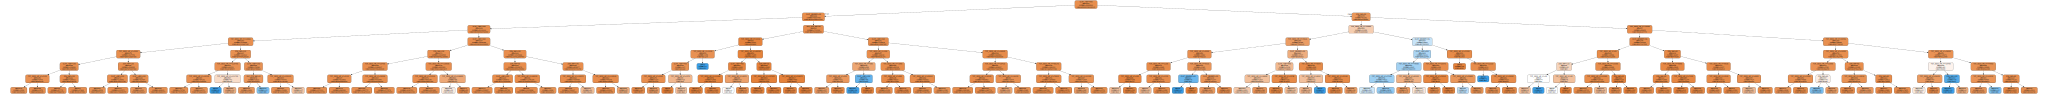

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="top1_prod.dot",
        feature_names=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE'],
     #   class_names=model.classes_,
        rounded=True,
        filled=True
    )

import graphviz

with open("top1_prod.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='top1_prod', directory='./', cleanup=True)
dot

## 2순위 화장품/뷰티케어

In [59]:
from sklearn.preprocessing import LabelEncoder
cosmetic = data['CLAC1_NM']== '화장품/뷰티케어'
encode_ACT = LabelEncoder()
encode_ACT.fit(cosmetic)

cosmetic = encode_ACT.transform(cosmetic)

In [60]:
cosmetic = pd.DataFrame(cosmetic)
cosmetic[:2]

,0
0,0
1,0


In [61]:
cosmedata = pd.concat([cosmetic, data], axis=1)
cosmedata.head()

,0,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,0,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0,스포츠패션
1,0,1,7935714,554336,14.0,4144914.0,107.0,1.0,1.0,40.0,유아동의류
2,0,2,4050743,149995,14.0,4147643.0,3850.0,1.0,0.0,30.0,패션잡화
3,0,3,6537318,570603,6.0,4148106.0,144.0,1.0,0.0,30.0,스포츠패션
4,1,4,3942102,755148,14.0,4370295.0,2190.0,1.0,0.0,30.0,화장품/뷰티케어


In [62]:
cols=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE']
final = data[cols]
final[:3]

,TOT_SESS_HR_V,ZON_NM,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,113.0,7.0,1.0,0.0,40.0
1,107.0,14.0,1.0,1.0,40.0
2,3850.0,14.0,1.0,0.0,30.0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, 
                                cosmedata[[0]], test_size=0.1, random_state=13)

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8862179093331725


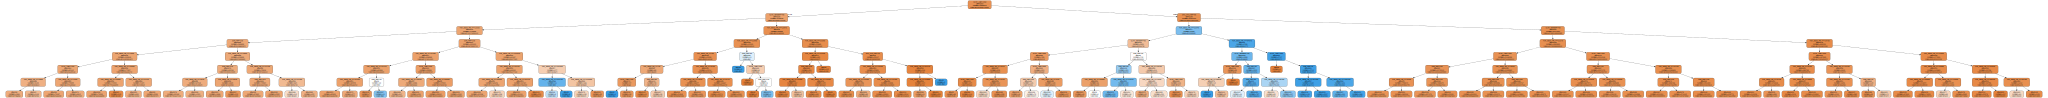

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="top2_prod.dot",
        feature_names=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE'],
     #   class_names=model.classes_,
        rounded=True,
        filled=True
    )

import graphviz

with open("top2_prod.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='top2_prod', directory='./', cleanup=True)
dot

## 선미의 오야니 가방

In [43]:
# 622881

from sklearn.preprocessing import LabelEncoder
sunmi = data['PD_C']== 622881
encode_ACT = LabelEncoder()
encode_ACT.fit(sunmi)

sunmi = encode_ACT.transform(sunmi)

In [44]:
sunmi = pd.DataFrame(sunmi)
sunmi[:2]

,0
0,0
1,0


In [45]:
sundata = pd.concat([sunmi, data], axis=1)
sundata[:2]

,0,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
0,0,0,10189797,570603,7.0,4140076.0,113.0,1.0,0.0,40.0,스포츠패션
1,0,1,7935714,554336,14.0,4144914.0,107.0,1.0,1.0,40.0,유아동의류


In [22]:
cols=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE']
final = data[cols]
final[:3]

,TOT_SESS_HR_V,ZON_NM,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,113.0,7.0,1.0,0.0,40.0
1,107.0,14.0,1.0,1.0,40.0
2,3850.0,14.0,1.0,0.0,30.0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, 
                                sundata[[0]], test_size=0.1, random_state=13)

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.9995227151811318


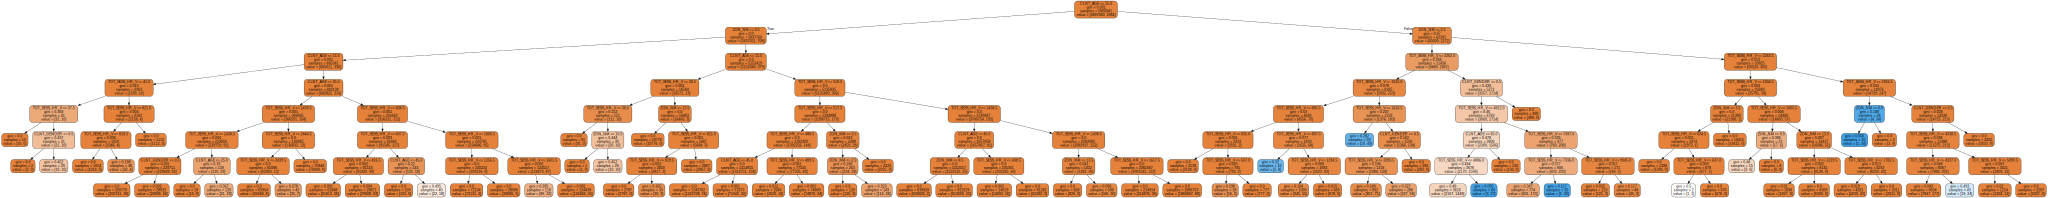

In [25]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="sunmi.dot",
        feature_names=['TOT_SESS_HR_V','ZON_NM','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE'],
     #   class_names=model.classes_,
        rounded=True,
        filled=True
    )

import graphviz

with open("sunmi.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='sunmi', directory='./', cleanup=True)
dot

## 각 attribute 성능 측정

In [66]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth=7)
model

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [68]:
# test데이터 라벨 예측
y_pred = model.predict(X_test)

In [69]:
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
## 예측데이터에 대한 모델 어큐러시 구한건데.. 위에서 구한 값이랑 똑같은걸 보니.. 같은 답을 도출하는
# 방법인듯 

0.8861509455260457

In [70]:
# 입력변수들의 중요도 확인(확률값)

model.feature_importances_
pd.DataFrame({'feature' : X_train.columns,'importance' : model.feature_importances_})

,feature,importance
0,TOT_SESS_HR_V,0.133120
1,ZON_NM,0.029705
2,DVC_CTG_NM,0.147609
3,CLNT_GENDER,0.145976
4,CLNT_AGE,0.543589


In [21]:
# 모델의 정답에 대한 정보 확인

model.classes_

array([0, 1], dtype=int64)

## 결과 확인해 보는 곳!

In [57]:
d1 = data['CLNT_GENDER'] == 1
d2 = data['TOT_SESS_HR_V'] >= 1439#
d3 = data['TOT_SESS_HR_V'] <= 2440 #
d4 = data['CLNT_AGE'] <=30##
dd4 = data['CLNT_AGE'] >=20# 
d5 = data['ZON_NM'] == 0  #
d6 = data['DVC_CTG_NM'] == 2 #

z1 = data['ZON_NM'] == 1
z2 = data['ZON_NM'] == 2
z3 = data['ZON_NM'] == 3
z4 = data['ZON_NM'] == 4
z5 = data['ZON_NM'] == 5
z6 = data['ZON_NM'] == 6
z7 = data['ZON_NM'] == 7
z8 = data['ZON_NM'] == 8
z9 = data['ZON_NM'] == 9

subset_fashion = data[ d2& d3 & d4 &d5 &dd4]
#subset_fashion = data [z1 | z2 | z3 | z4 | z5| z6| z7| z8| z9]

In [58]:
subset_fashion
#ss = subset_fashion['CLAC1_NM'] == '화장품/뷰티케어'
sunmi = subset_fashion['PD_C']== 622881
#subset_fashion[ss]
subset_fashion[sunmi]

,Unnamed: 0,SESS_ID,PD_C,ZON_NM,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,CLAC1_NM
4030682,4030682,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4030707,4030707,3191044,622881,0.0,1082727.0,2440.0,1.0,0.0,30.0,패션잡화
4032114,4032114,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4032135,4032135,3191044,622881,0.0,1082727.0,2440.0,1.0,0.0,30.0,패션잡화
4033738,4033738,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4033742,4033742,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4039363,4039363,3191044,622881,0.0,1082727.0,2440.0,1.0,0.0,30.0,패션잡화
4049813,4049813,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4049817,4049817,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화
4049821,4049821,1966847,622881,0.0,2154638.0,1439.0,1.0,0.0,30.0,패션잡화


### 마지막 순위 출력해보기 

In [139]:
dd2 = encode['CLAC1_NM']== '자동차용품'

In [140]:
dd2
encode_ACT = LabelEncoder()
encode_ACT.fit(dd2)

dd2 = encode_ACT.transform(dd2)
dd2 = pd.DataFrame(dd2)
dd2
##

,0
0,0
1,0
2,0
3,0
4,0
...,...
160851,0
160852,0
160853,0
160854,0


In [114]:
last = pd.concat([encode, dd2], axis=1)
last[145:150]

,Unnamed: 0,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLAC1_NM,CLNT_GENDER,CLNT_AGE,0
145,152,2386,1,1,남성의류,0,40.0,0
146,153,2386,1,1,남성의류,0,40.0,0
147,154,4103,1,1,속옷/양말/홈웨어,0,40.0,0
148,155,4103,1,1,속옷/양말/홈웨어,0,40.0,0
149,156,4103,1,1,속옷/양말/홈웨어,0,40.0,0


In [141]:
last[0]

0         0
1         0
2         0
3         0
4         0
         ..
160851    0
160852    0
160853    0
160854    0
160855    0
Name: 0, Length: 160856, dtype: int64

In [115]:
encoded

,TOT_SESS_HR_V,ACTION,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,1890,1,1,0,20.0
1,1890,1,1,0,20.0
2,1890,1,1,0,20.0
3,1604,1,1,0,20.0
4,632,1,1,0,20.0
...,...,...,...,...,...
160851,2150,1,1,0,40.0
160852,2150,1,1,0,40.0
160853,967,0,1,0,30.0
160854,967,0,1,0,30.0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(encoded, 
                                last[[0]], test_size=0.1, random_state=13)

In [89]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [90]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.9997651447123023


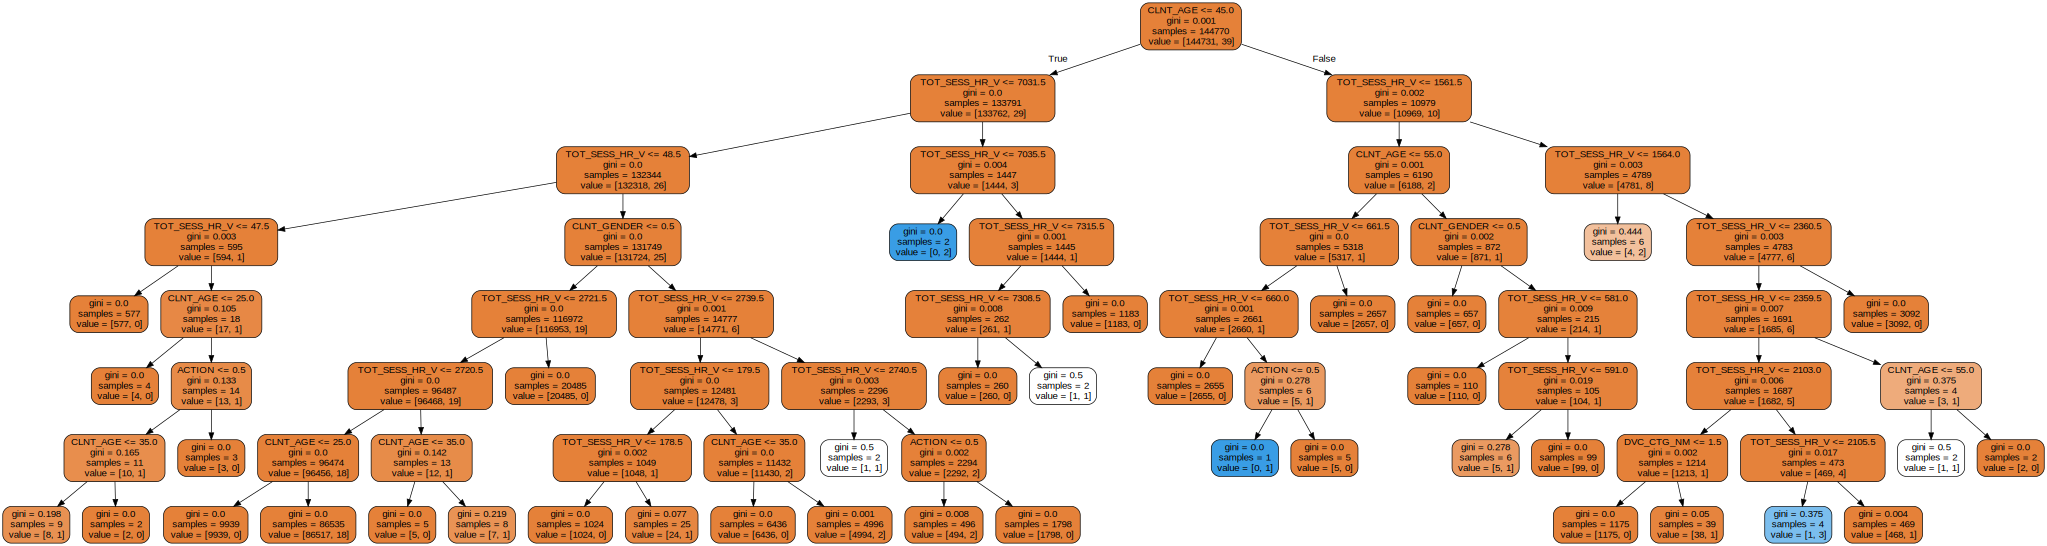

In [116]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="bottom1_prod.dot",
        feature_names=['TOT_SESS_HR_V','ACTION','DVC_CTG_NM','CLNT_GENDER','CLNT_AGE'],
       # class_names=[],  # 얘할때는 반대로??? 도대체 기준이 뭔가.. 
        rounded=True,
        filled=True
    )

import graphviz

with open("bottom1_prod.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='bottom1_prod', directory='./', cleanup=True)
dot

## 확인

In [ ]:
d1 = newdata['CLNT_GENDER'] == 1
d2 = newdata['TOT_SESS_HR_V'] > 2154
d3 = newdata['TOT_SESS_HR_V'] <= 8470
d4 = newdata['CLNT_AGE'] > 25  # 
d5 = newdata['ZON_NM'] ==0
d6 = newdata['DVC_CTG_NM'] == 1 #
subset_fashion = newdata[ d3& d2& d4 & d6]


In [ ]:
subset_fashion

### 앙상블 - 랜덤포레스트  -> 1순위 패션잡화에 대한 분석

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

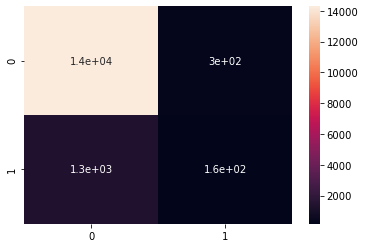

In [152]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=[0,1], index=[0,1])
sns.heatmap(cm, annot=True)

score도 약 0.9 이고, matrix로 보는것처럼.. 분류를 꽤, 정확히 하는듯..?